## **Chapter 7: Learning from Images**
*  Working through an image recognition problem, step by step
*  Building Feed-Forward Neural Network (FFNN) to classify images
*  Loading data using Datasets and DataLoaders
*  Using a classification loss
*  Describing convolutional networks
*  Building a CNN to classify images

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2,linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets
data_path='/content/CIFAR'
cifar10=datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val=datasets.CIFAR10(data_path,train=False,download=True)

Extracting /content/CIFAR/cifar-10-python.tar.gz to /content/CIFAR
Files already downloaded and verified


In [3]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

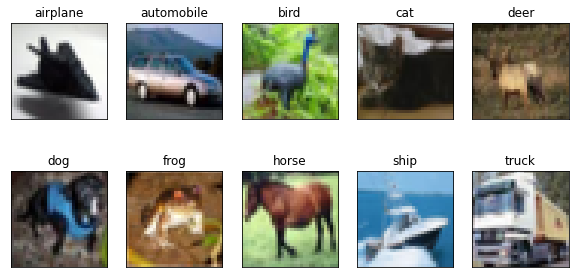

In [4]:
fig=plt.figure(figsize=(10,5),facecolor='white')
num_classes=10
for i in range(num_classes):
  ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
  ax.set_title(class_names[i])
  img=next(img for img, label in cifar10 if label==i)
  plt.imshow(img)
plt.show()

In [5]:
#Checking the Method Resolution Order of CIFAR10 Data
#is the order in which Python looks for a method in a hierarchy of classes
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [6]:
type(cifar10_val).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [7]:
#Length of CIFAR10 Data
len(cifar10)

50000

In [8]:
len(cifar10_val)

10000

In [9]:
#Calling the n-th data from CIFAR10 datasets
n=9999
img,label=cifar10[n]
img,label,class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F07DCF484E0>, 5, 'dog')

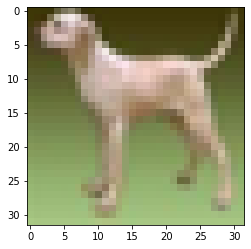

In [10]:
#Showing the n-th data from CIFAR10 datasets
plt.figure(facecolor='white')
plt.imshow(img)
plt.show()

In [11]:
from torchvision import transforms

In [12]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [13]:
#In this code, we will use 'ToTensor' function ro transform the image data to tensor data
totensor=transforms.ToTensor()
img_t=totensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [14]:
tensorcifar10=datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.ToTensor())

In [15]:
img_t,_=tensorcifar10[n]
type(img_t)

torch.Tensor

In [16]:
img_t.shape,img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [17]:
img_t.min(),img_t.max()

(tensor(0.0157), tensor(0.9882))

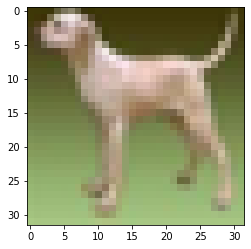

In [18]:
plt.figure(facecolor='white')
plt.imshow(img_t.permute(1,2,0))
plt.show()

#### **7.2 Normalizing Data**

In [19]:
imgs=torch.stack([img_t for img_t, _ in tensorcifar10],dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [20]:
avg=imgs.view(3,-1).mean(dim=1)

In [21]:
sd=imgs.view(3,-1).std(dim=1)

In [22]:
transforms.Normalize(avg,sd)

Normalize(mean=tensor([0.4915, 0.4823, 0.4468]), std=tensor([0.2470, 0.2435, 0.2616]))

In [23]:
transformedcifar10=datasets.CIFAR10(data_path,train=True,download=False,
                                    transform=transforms.Compose([transforms.ToTensor(),
                                                                  transforms.Normalize(avg,sd)]))

In [24]:
transformedcifar10_val=datasets.CIFAR10(data_path,train=False,download=False,
                                        transform=transforms.Compose([transforms.ToTensor(),
                                                                      transforms.Normalize(avg,sd)]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


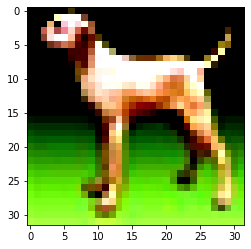

In [25]:
img_t,_=transformedcifar10[n]

plt.figure(facecolor='white')
plt.imshow(img_t.permute(1,2,0))
plt.show()